In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score, ConfusionMatrixDisplay, balanced_accuracy_score,f1_score

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sys import platform

labels={0:'clean',1:'high fry',2:'layered',3:'lowfry',4:'midfry',5:'no_vocals'}
# labels={0:'clean',1:'scream',2:'no vocal'}

In [2]:
n_class = '6class'

X_train=np.load(f'./resources/working_data/{n_class}_x_train-features_unnormalized.npy',allow_pickle=True)
X_test=np.load(f'./resources/working_data/{n_class}_x_test-features_unnormalized.npy',allow_pickle=True)
X_valid=np.load(f'./resources/working_data/{n_class}_x_valid-features_unnormalized.npy',allow_pickle=True)

y_train_hot=np.load(f'./resources/working_data/{n_class}_y_train-features_unnormalized.npy',allow_pickle=True)
y_test_hot=np.load(f'./resources/working_data/{n_class}_y_test-features_unnormalized.npy',allow_pickle=True)
y_valid_hot=np.load(f'./resources/working_data/{n_class}_y_valid-features_unnormalized.npy',allow_pickle=True)

y_train = np.argmax(y_train_hot,axis=1)
y_test = np.argmax(y_test_hot,axis=1)
y_valid = np.argmax(y_valid_hot,axis=1)
#df = pd.DataFrame(d,columns=feature_cols)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_valid=scaler.transform(X_valid)

In [3]:
def classwise_accuracy(cm):
    a=np.zeros(cm.shape)
    for i,x in enumerate(cm):
        a[i]=x/sum(x)
    return a

In [4]:
def eval_metrics(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    acc = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred,average='macro')
    macro_acc = balanced_accuracy_score(y_test,y_pred)
    classwise_acc = classwise_accuracy(cm)
    return(cm,acc,f1,macro_acc,classwise_acc)

# kNN

Overall Accuracy Score: 0.34976525821596244
Macro Accuracy: 0.3411335684094022
Class-wise accuracy: 
[[0.49152542 0.19774011 0.07909605 0.03389831 0.18644068 0.01129944]
 [0.16071429 0.42857143 0.03571429 0.08928571 0.21428571 0.07142857]
 [0.31854839 0.28225806 0.18145161 0.06048387 0.15322581 0.00403226]
 [0.14925373 0.25373134 0.11940299 0.         0.47761194 0.        ]
 [0.21794872 0.31410256 0.13461538 0.05128205 0.26282051 0.01923077]
 [0.11486486 0.14189189 0.00675676 0.01351351 0.04054054 0.68243243]]


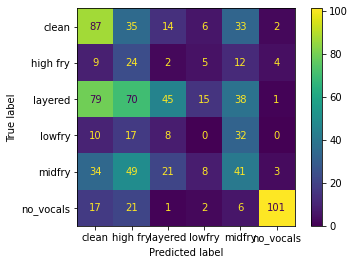

In [5]:
k=4
KNN_model = KNeighborsClassifier(n_neighbors=k)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)

cm,acc,f1,macro_acc,classwise_acc = eval_metrics(y_test,KNN_prediction)

print(f"Overall Accuracy Score: {acc}")
print(f"Macro Accuracy: {macro_acc}")
print(f"Class-wise accuracy: \n{classwise_acc}")
l=labels.values()
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=l).plot()

# SVM

Overall Accuracy Score: 0.4424882629107981
Macro Accuracy: 0.41921159978188943
Class-wise accuracy: 
[[0.80225989 0.03954802 0.01694915 0.02259887 0.08474576 0.03389831]
 [0.23214286 0.375      0.07142857 0.         0.21428571 0.10714286]
 [0.27016129 0.29435484 0.15725806 0.10483871 0.15322581 0.02016129]
 [0.10447761 0.08955224 0.11940299 0.02985075 0.65671642 0.        ]
 [0.06410256 0.33974359 0.17307692 0.05769231 0.33333333 0.03205128]
 [0.06081081 0.0472973  0.00675676 0.02702703 0.04054054 0.81756757]]


NameError: name 'plt' is not defined

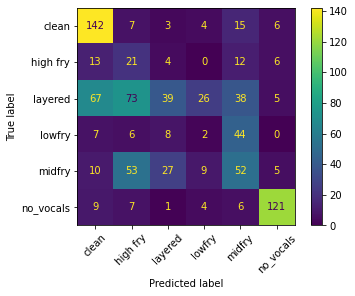

In [7]:

SVM_model = SVC(gamma='scale',C=1.0533, kernel='poly', degree=2,coef0=2.1,random_state=42)
SVM_model.fit(X_train, y_train)

SVM_prediction = SVM_model.predict(X_test)

cm,acc,f1,macro_acc,classwise_acc = eval_metrics(y_test,SVM_prediction)

print(f"Overall Accuracy Score: {acc}")
print(f"Macro Accuracy: {macro_acc}")
print(f"Class-wise accuracy: \n{classwise_acc}")
l=labels.values()
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=l)
disp.plot(xticks_rotation=45)
plt.rcParams.update({'font.size': 18})
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.tight_layout()

plt.savefig('/Users/vedant/Desktop/Programming/ScreamDetection/charts/svm-6class.pdf')
# ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=l,xticks_rotation=-15).plot()

# RF

Overall Accuracy Score: 0.41431924882629106
Macro Accuracy: 0.4089503096815836
Class-wise accuracy: 
[[0.63841808 0.13559322 0.00564972 0.02824859 0.18079096 0.01129944]
 [0.16071429 0.44642857 0.03571429 0.07142857 0.21428571 0.07142857]
 [0.24596774 0.30241935 0.08870968 0.0766129  0.26612903 0.02016129]
 [0.07462687 0.19402985 0.05970149 0.         0.67164179 0.        ]
 [0.04487179 0.37179487 0.05128205 0.07692308 0.44230769 0.01282051]
 [0.05405405 0.08108108 0.         0.02027027 0.00675676 0.83783784]]


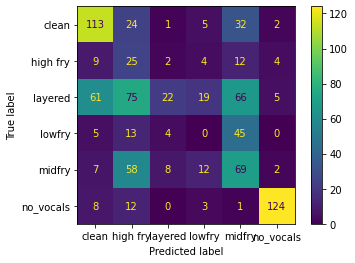

In [7]:
RF_model = RandomForestClassifier(n_estimators=90,criterion='gini',max_depth=None,\
    min_samples_split=2,min_samples_leaf=1,max_features='auto',max_leaf_nodes=None,class_weight='balanced',random_state=42)
RF_model.fit(X_train, y_train)
RF_prediction = RF_model.predict(X_test)

cm,acc,f1,macro_acc,classwise_acc = eval_metrics(y_test,RF_prediction)

print(f"Overall Accuracy Score: {acc}")
print(f"Macro Accuracy: {macro_acc}")
print(f"Class-wise accuracy: \n{classwise_acc}")
l=labels.values()
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=l).plot()